In [204]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

import re
from nltk import pos_tag
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer 

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context = 'notebook', style = 'whitegrid')

In [270]:
df = pd.read_csv('../../data/judge-1377884607_tweet_product_company.csv', encoding = 'latin1')
df.columns = ['text', 'target', 'emotion']

df = df[df['emotion'] != 'I can\'t tell']
df['target'].replace(['iPad', 'iPad or iPhone App', 'iPhone', 'Other Apple product or service'], 'Apple', inplace = True)
df['target'].replace(['Other Google product or service'], 'Google', inplace = True)
df['target'].replace(['Android App'], 'Android', inplace = True)

df['target'].fillna('No Target', inplace = True)
df.dropna(inplace = True)

# Initial EDA

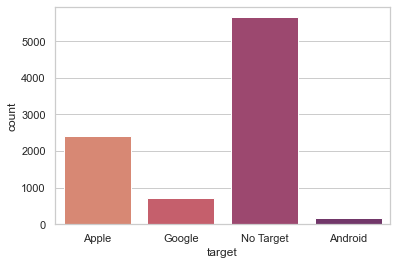

In [136]:
sns.set(context = 'notebook', style = 'whitegrid', font_scale = 1)

ax = sns.countplot(x = 'target', data = df, palette = 'flare')

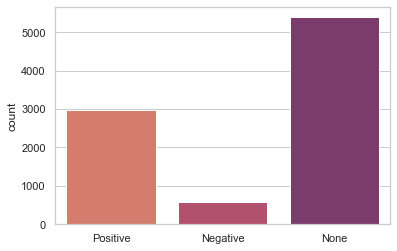

In [140]:
sns.set(context = 'notebook', style = 'whitegrid', font_scale = 1)

ax = sns.countplot(x = 'emotion', data = df, palette = 'flare', order = ['Positive emotion', 'Negative emotion', 'No emotion toward brand or product'])
ax.set(xlabel = '', xticklabels = ['Positive', 'Negative', 'None'])
plt.show()

In [150]:
df.groupby(['target', 'emotion']).count()

text
target    emotion                                 
Android   Negative emotion                      16
          No emotion toward brand or product     2
          Positive emotion                     141
Apple     Negative emotion                     388
          No emotion toward brand or product    65
          Positive emotion                    1949
Google    Negative emotion                     115
          No emotion toward brand or product    24
          Positive emotion                     582
No Target Negative emotion                      51
          No emotion toward brand or product  5297
          Positive emotion                     306

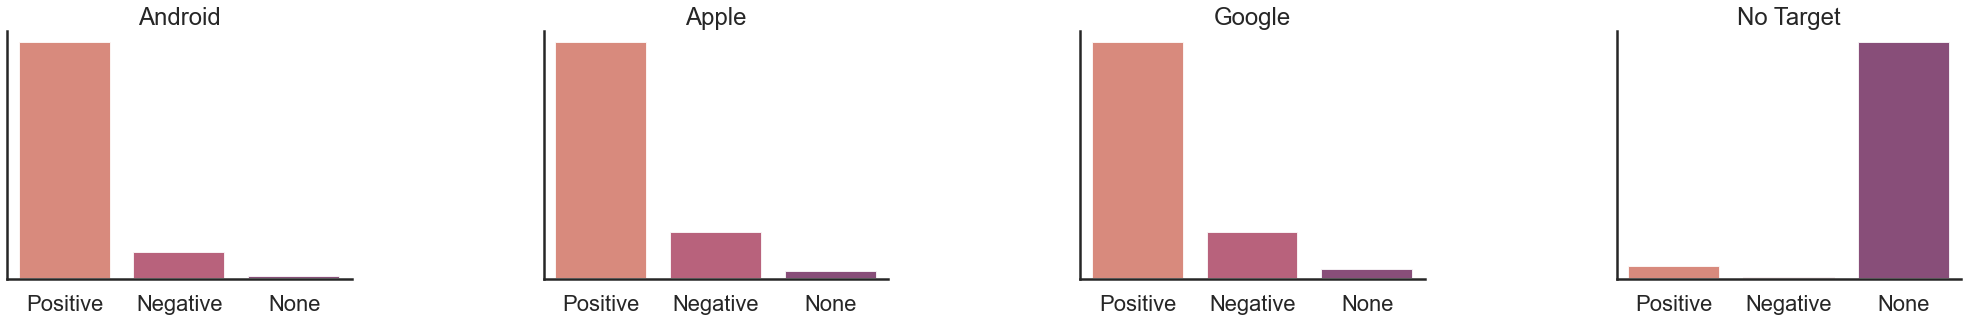

In [154]:
sns.set(context = 'poster', style = 'white', font_scale = 1)
xlabel = ''
ylabel = ''
xticks = ['Positive', 'Negative', 'None']
yticks = ''
order = ['Positive emotion', 'Negative emotion', 'No emotion toward brand or product']
col_order = ['Android','Apple', 'Google', 'No Target']
ax = sns.catplot(data = df, x = 'emotion', col = 'target', kind = 'count', palette = 'flare', order = order, col_order = col_order, col_wrap = 4, sharey = False, height = 5, aspect = 1.5, alpha = 0.9)
ax.set(xlabel = xlabel, ylabel = ylabel, xticklabels = xticks, yticklabels = yticks, title = 'Tweet Emotion per Target')
ax.despine(left = False)
ax.set_titles('{col_name}')
plt.show()

# Text Cleaning

In [275]:
sw = stopwords.words('english')
sw.extend(['would', 'one', 'say'])
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~“!'
twitter_re = re.compile('[#@][a-zA-Z]*')
num_re = re.compile('^\d{1}$')

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def txt_clean(txt, stop_words=sw):
    t = txt.split(' ')
    t = [w.lower() for w in t]
    t = [w for w in t if w not in stop_words]
    t = [w.translate(w.maketrans('','', punctuation)) for w in t]
    t = [w for w in t if not twitter_re.match(w)]
    t = [w for w in t if not num_re.match(w)]
    t = [w for w in t if w]
    t = pos_tag(t)
    t = [(w[0], get_wordnet_pos(w[1])) for w in t]
    lem = WordNetLemmatizer()
    t = [lem.lemmatize(w[0], w[1]) for w in t]
    return ' '.join(t)

df['txt_cleaned'] = df['text'].map(txt_clean)